In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,2
110,111,6.5,3.2,5.1,2.0,2
123,124,6.3,2.7,4.9,1.8,2
3,4,4.6,3.1,1.5,0.2,0
16,17,5.4,3.9,1.3,0.4,0


In [6]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Parameters and thier use in Random Forest:-
#### max_samples 
* Max_sample is used to set the number of samples for each random subset. 


* By default it is 'none' means all the samples will take in all random subsets but with rows replacement.


* We can set this parameter in integer as well as in float(0-1).


* Float means how much percentage of rows will take by each subset and int means no. of rows take by each subset.


* max_samples = 0.9 or max_samples = 90,100,52, etc.

#### max_features 

* By default max_features = 'auto'


* Max_features is use to set a number of feature to create a random subset of data.


* There are 3 options available to set this parameter which are 'auto', 'sqrt', 'log2'


* max_features = 'auto' means it will take square root of total number of features and put features in random subset according that value. For eg: total number of columns are 10, square root of 10 is 3.16 so it will take 3 features randomly from trainning data to create a subset. But in decision tree algorithm this parameter takes all features when it set to auto.


* max_features = 'sqrt' means it will work same as auto in random forest. 


* max_features = 'log' means it will multiple the total number of features to the value of log2 which is 0.3010 and what the values comes it will take that value to put features in random subset. Eg: total number of features are 10, 0.3010 * 10 = 3.010, So it will randomly take 3 features to create random subset.   


* We can set this parameter in integer as well as in float(0-1).


* Float means how much percentage of feature will take by each subset and int means no. of columns take by each subset.


* max_features = 0.9 or max_features = 10,12,15,20, etc.

#### bootstrap

* Bootstrap parameter is used to define that create subset with row sampling with replacement or not.


* By default bootstrap = True, means create subset with row sampling with replacement.


* If bootstrap = False, means take all rows to create subset not take random rows.


* Row sampling with replacement means some rows repeat again in same subset.


* It will take approx 66.66% of total rows from original data to make a subset because some of the rows are repeating.


### oob_score


* This parameter is used to evaulate the performance of OOB Data.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(oob_score =True, max_samples = 0.8, max_features = 'auto',bootstrap=True) 
rfc.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.8, oob_score=True)

In [10]:
rfc.score(X_train,y_train),rfc.score(X_test,y_test)

(1.0, 0.98)

In [12]:
rfc.oob_score_

0.92

In [10]:
from sklearn.metrics import accuracy_score
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
trainning_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred_test,y_test)
print('Trainning accuracy =',trainning_accuracy)
print('Test accuracy =',test_accuracy)

Trainning accuracy = 1.0
Test accuracy = 0.98


In [11]:
# View the predicted probabilities of the first 10 observations

rfc.predict_proba(X_train)[:10]

array([[0.  , 0.99, 0.01],
       [0.  , 0.  , 1.  ],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04]])

In [12]:
predictions = rfc.predict(X_train)
predictions

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [13]:
X_train['pred'] = predictions
X_train['original_pred'] = y_train
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,pred,original_pred
96,5.7,2.9,4.2,1.3,1,1
105,7.6,3.0,6.6,2.1,2,2
66,5.6,3.0,4.5,1.5,1,1
0,5.1,3.5,1.4,0.2,0,0
122,7.7,2.8,6.7,2.0,2,2
...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1,1
106,4.9,2.5,4.5,1.7,2,2
14,5.8,4.0,1.2,0.2,0,0
92,5.8,2.6,4.0,1.2,1,1


In [15]:
feature_importances = rfc.feature_importances_
feature_importances

array([0.10524584, 0.04425913, 0.43461605, 0.41587898])

In [23]:
# create a dataframe with feature names and their importances and sort features by importance

feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
feature_importances_df

,feature,importance
2,PetalLengthCm,0.434616
3,PetalWidthCm,0.415879
0,SepalLengthCm,0.105246
1,SepalWidthCm,0.044259


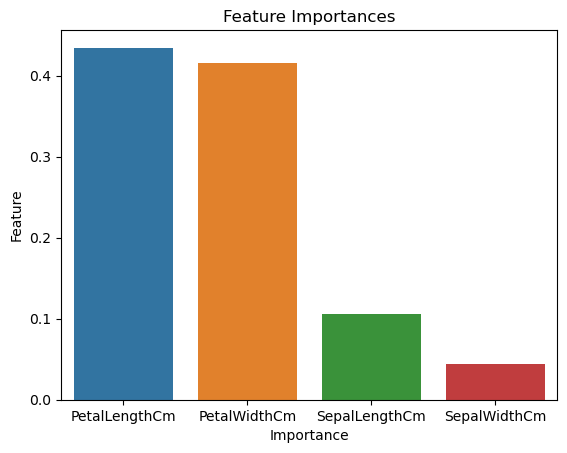

In [22]:
# create a bar chart to visualize feature importances

sns.barplot(x='feature', y='importance', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Grid search for hyper-parameter tuning

In [20]:
# Create the parameter grid based on the results of random search 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (link to show parameters)
# n_estimatorsint, default=100 (Number of decision trees will build)

params = {
    'n_estimators':[*range(100,250,3)],
    'criterion':["gini", "entropy", 'log_loss'],
    'max_depth':[*range(1,20,1)],
    'min_samples_split':[*range(1,20,1)],
    'min_samples_leaf':[5, 10, 20, 50, 100],
    'max_features' : ["auto", "sqrt", "log2"],
    'max_samples':[0.5,0.6,0.7,0.8,0.9]
}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rfc, param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [12]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5625 candidates, totalling 28125 fits
Wall time: 8min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [1, 5, 9, 13, 17],
                         'n_estimators': [1, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                       min_samples_split=9, n_estimators=1)

In [14]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 9,
 'n_estimators': 1}

In [17]:
rfc = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                       min_samples_split=9, n_estimators=1,criterion='gini')

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                       min_samples_split=9, n_estimators=1)

In [20]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [32]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.94
Train Confusion Matrix:
[[31  0  0]
 [ 0 30  5]
 [ 0  1 33]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 14  1]
 [ 0  0 16]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [34]:
rfc.n_features_ 

4

In [36]:
rfc.feature_names_in_

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

In [38]:
rfc.n_outputs_ 

1

# Variable importance in RandomForest and Decision trees

In [39]:
rfc.feature_importances_

array([0.        , 0.00093377, 0.43828206, 0.56078418])

In [41]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rfc.feature_importances_
})

In [42]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,PetalWidthCm,0.560784
2,PetalLengthCm,0.438282
1,SepalWidthCm,0.000934
0,SepalLengthCm,0.000000
